# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


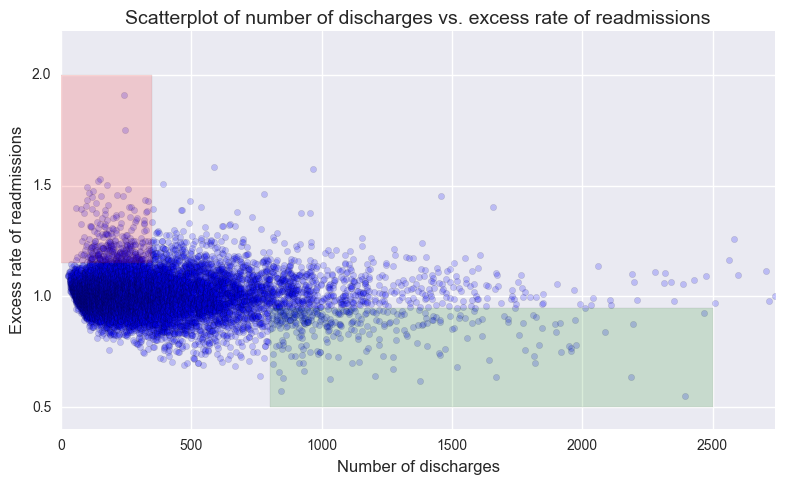

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [5]:
df = clean_hospital_read_df[:]

# Remove unnecessary columns
df = df.drop(['Start Date','End Date','Footnote','Provider Number'], axis = 1)

# Rename columns to something more manageable
df.columns = ['name','state','measure','discharges','excess_rr','predicted_rr','expected_rr','readmissions']
df.head()

,name,state,measure,discharges,excess_rr,predicted_rr,expected_rr,readmissions
16857,THREE RIVERS MEDICAL CENTER,KY,READM-30-HIP-KNEE-HRRP,0,NaN,NaN,NaN,NaN
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,AZ,READM-30-COPD-HRRP,0,NaN,NaN,NaN,NaN
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,SD,READM-30-AMI-HRRP,0,NaN,NaN,NaN,NaN
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,FL,READM-30-COPD-HRRP,0,NaN,NaN,NaN,NaN
14551,GREENE COUNTY HOSPITAL,AL,READM-30-AMI-HRRP,0,NaN,NaN,NaN,NaN


# Analysis of Report
### Initial Observations
The author asserts that a hospital's number of discharges is anti-correlated with its excess readmission ratio, but this claim is dubious. A quick analysis of the correlation coefficient reveals that with $r = -0.097$, the negative correlation among all hospitals between discharges and excess readmission ratio does not exist.

In [6]:
df = df[df.excess_rr.notnull()]
correlation, p_value = stats.pearsonr(df.discharges, df.excess_rr)
print('correlation:',correlation)
print('p-value:',p_value)

correlation: -0.0973979435108
p-value: 1.22254737768e-25


### Statistics

Next, the author points out that there exists a difference between the readmissions ratios between hospitals with the least discharges and those with the most. Let us perform a hypothesis test to examine the statistical significance of this observed difference. Let $\mu_{low}$ represent the mean readmissions ratio for low-discharge hospitals and $\mu_{high}$ represent that of high-discharge hospitals.

$H_0: \mu_{low} - \mu_{high} = 0$

$H_A: \mu_{low} - \mu_{high} > 0$

In [7]:
excess_rr_low = df[df.discharges < 100].excess_rr
excess_rr_high = df[df.discharges > 1000].excess_rr

# calculate mean excess readmissions ratio for low and high discharge hospitals
mu_low = excess_rr_low.mean()
mu_high = excess_rr_high.mean()
n_low = len(excess_rr_low)
n_high = len(excess_rr_high)
var_low = excess_rr_low.var()
var_high = excess_rr_high.var()

t_statistic = (mu_low - mu_high) / np.sqrt(var_low / n_low + var_high / n_high)
p_value = 1 - stats.t.cdf(t_statistic, min(n_low, n_high)-1)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 7.6017424185
p-value: 8.22675261247e-14


In [8]:
# confirm results with scipy stats package
stats.ttest_ind(excess_rr_low, excess_rr_high, equal_var = False)

Ttest_indResult(statistic=7.6017424185004856, pvalue=1.2752435451140344e-13)

With a p-value of $8.23\times10^{-14} < \alpha = .01$, we are 99% confident that the readmissions ratio of low-discharge hospitals is higher than the readmissions ratio of high-discharge hospitals and reject the null hypothesis.

Next, the author claims that low-discharge hospitals have a much higher proportion of excess readmission ratios greater than 1 than do low-discharge hospitals. Let $p_{low}$ represent the proportion of high excessive readmission ratios for low-discharge hospitals and $p_{high}$ represent that of high-discharge hospitals.

$H_0: p_{low} - p_{high} = 0$

$H_A: p_{low} - p_{high} > 0$

In [9]:
low_discharge = df[df.discharges < 100]
high_discharge = df[df.discharges > 1000]

x_low = len(low_discharge[low_discharge.excess_rr > 1])
x_high = len(high_discharge[high_discharge.excess_rr > 1])
n_low = len(low_discharge)
n_high = len(high_discharge)
p_low = x_low / n_low
p_high = x_high / n_high

z_statistic = (p_low - p_high) / np.sqrt(p_low * (1 - p_low) / n_low + p_high * (1 - p_high) / n_high)
p_value = 1 - stats.norm.cdf(z_statistic)
print('z-statistic:', z_statistic)
print('p-value:', p_value)

z-statistic: 6.93378699676
p-value: 2.04858352504e-12


With a p-value of $2.04\times10^{-12} < \alpha = .01$, we are 99% confident that the proportion of high excessive readmission ratios of low-discharge hospitals is higher than that of high-discharge hospitals and reject the null hypothesis.

### Visualization
The author's scatter plot provides the advantage of allowing readers to assess whether some bivariate relationship exists within the data points of interest. However, because such a relationship is hard to discern for this particular sample, the author is better off using visualizations that provide high level summaries of the data.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


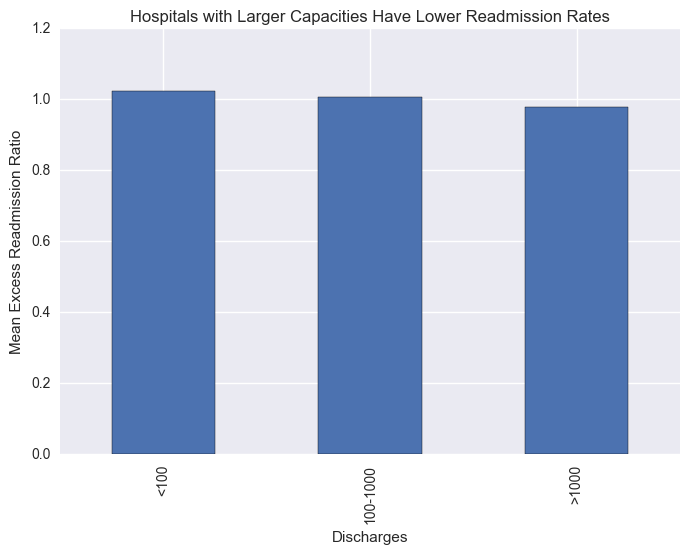

In [40]:
def discharge_to_size(x):
    if x < 100:
        return 1
    elif x < 1000:
        return 2
    else:
        return 3

temp_df = df[:]
temp_df['size'] = temp_df.discharges.apply(discharge_to_size)
plot1_df = temp_df.groupby('size').mean()
g = plot1_df.excess_rr.plot(kind = 'bar')
g.set(xlabel = 'Discharges', xticklabels = ['<100','100-1000','>1000'], ylabel = 'Mean Excess Readmission Ratio',
     title = 'Hospitals with Larger Capacities Have Lower Excuess Readmission Ratios')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


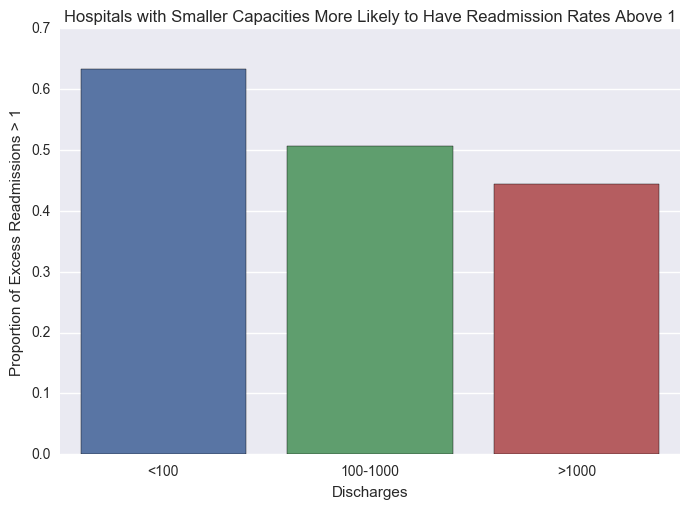

In [42]:
# create new column for whether facility has excess readmission ratio greater than 1
temp_df['high_excess'] = temp_df.excess_rr.apply(lambda x: True if x > 1 else False)

# calculate proportions for each size category
plot2_df = temp_df.groupby(['size','high_excess']).size().unstack('size')
proportions = plot2_df.iloc[1,:] / (plot2_df.iloc[1,:] + plot2_df.iloc[0,:])

# plot results
g = sns.barplot(x = ['<100','100-1000','>1000'], y = proportions)
g.set(xlabel = 'Discharges', ylabel = 'Proportion of Excess Readmissions > 1',
     title = 'Hospitals with Smaller Capacities More Likely to Have Readmission Ratios Above 1')

### Conclusions and Recommendations
The author suggests that the anti-correlation between hospital discharges and excess readmission ratio may be due to the fact that smaller hospitals/facilities lack the necessary resources to ensure quality care and prevent complications that lead to readmissions. His remedy is to impose quality-assurance regulation on smaller hospitals while encouraging them to consolidate into higher capacity facilities.

Unfortunately, the premise is untrue - the correlation between hospital discharges and excess readmissions ratio is far from statistically significant. While it may be that excess readmission ratios for the smallest facilities are higher than those of the largest, the author neglects to take into account mid-sized facilities. The available data defines a facility by its physical separation from other facilities. For example, multiple hospitals operating under the same system or name are counted as separate entities. Thus, the author's suggestion of hospital consolidation as a solution to the problem of excess readmission ratios is hugely impractical.

Because mid-size hospitals were omitted from the author's analysis, the aforementioned impracticality is compounded by the fact that the smallest hospitals would have to consolidate into facilities with capacities comparable to those of the largest before any significant reduction in excess readmission ratios would be observed. Therefore, the author's solutions are not to be endorsed.

# An Alternate View

The author's claims of correlation between discharges and excess readmission ratio appears unfounded. Instead, let's see if there exist any useful correlations in the data.

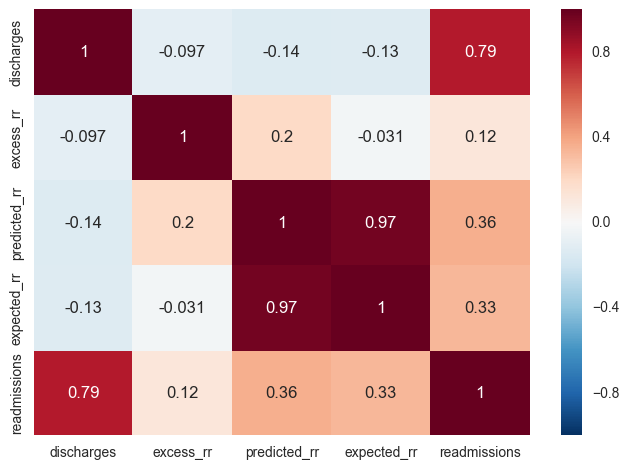

In [13]:
r = df.corr()
sns.heatmap(r, annot = True)

The correlation between expected readmissions rate and excess readmission ratio is superficial, as the latter is constructed from the former. However, the relationship between number of readmissions and number of discharges looks worth investigating.

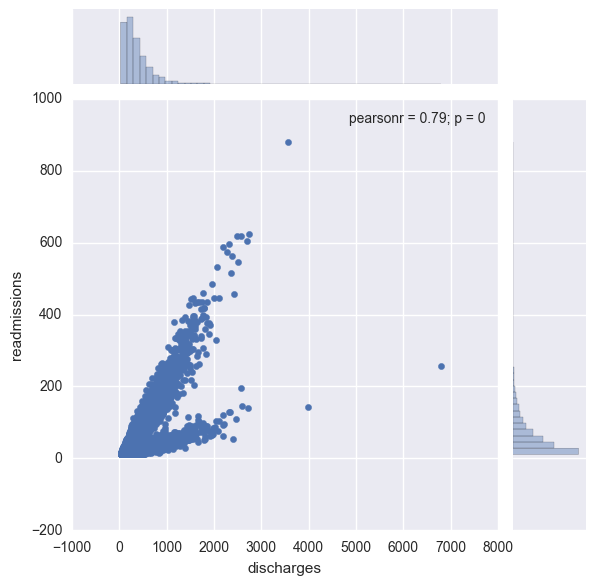

In [44]:
sns.jointplot(df.discharges, df.readmissions)

The above data shows that hospitals with more discharges also have more readmissions. This is to be expected, but what of the two apparent clusters? There is one group of hospitals for which readmission numbers are climbing much more steeply as discharges increase. As it turns out, separating hospitals by the readmission measure sheds some light.

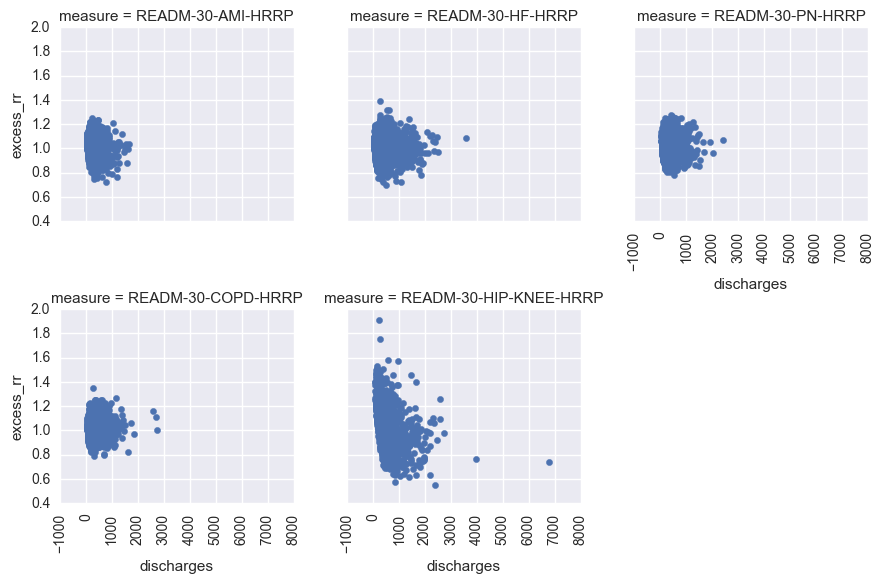

In [16]:
test_df = df[:]
#test_df = test_df[test_df.excess_rr > 1.1]

g = sns.FacetGrid(test_df, col = 'measure', col_wrap = 3)
g = g.map(plt.scatter, 'discharges','excess_rr')
g.set_xticklabels(rotation = 90)
plt.tight_layout()

From the data above, whereas readmissions for cardiovascular procedures are relatively stable, knee and hip procedures result in far more complications. It is also the hospitals that perform knee and hip surgeries that contribute to the correlation the author initially noticed.

### Discharges vs. Excess Readmission Ratio for Knee/Hip Facilities

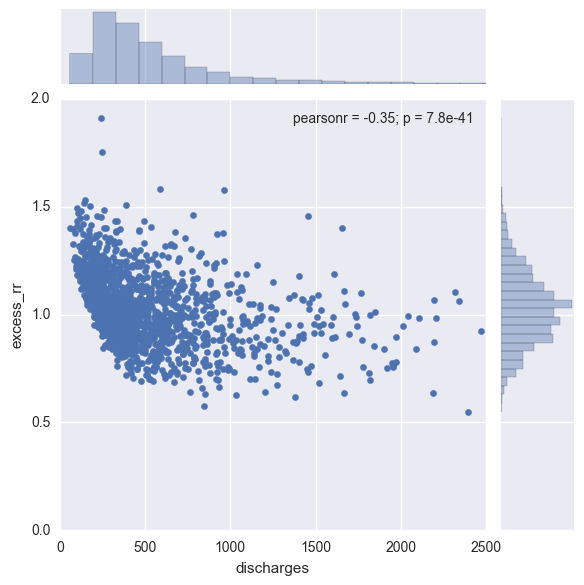

In [15]:
test_df = df[df.measure.str.contains('KNEE')]
sns.jointplot(test_df.discharges, test_df.excess_rr, xlim = (0,2500), ylim = (0,2))

### Discharges vs. Excess Readmission Ratio for Other Facilities

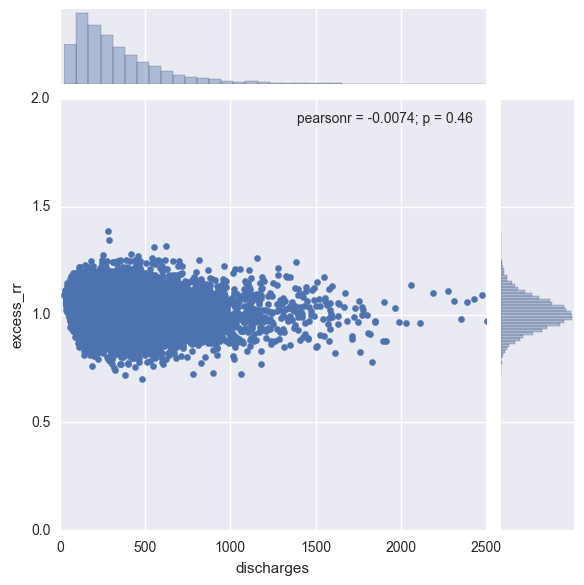

In [14]:
test_df = df[np.logical_not(df.measure.str.contains('KNEE'))]
sns.jointplot(test_df.discharges, test_df.excess_rr, xlim = (0,2500), ylim = (0,2))

It is important to note that many hospitals do not perform just knee/hip surgeries or just heart procedures. In fact,  hospitals that provide services in multiple areas are represented by multiple measures. Furthermore, large hospital systems may have multiple facilities of the same name.

In [46]:
test_df.name.value_counts().head()

GOOD SAMARITAN HOSPITAL     29
ST JOSEPH HOSPITAL          26
ST MARY'S MEDICAL CENTER    23
MEMORIAL HOSPITAL           23
MERCY MEDICAL CENTER        23
Name: name, dtype: int64

What is interesting however is that facilities that perform knee and hip surgery tend to not belong to a large hospital system.

In [49]:
test_df = df[(df.measure.str.contains('KNEE'))]
new_df = pd.concat([test_df.groupby(['name']).size(), test_df.groupby(['name']).mean()], axis = 1)
new_df = new_df.rename(columns = {0: 'system_size'})
new_df.system_size.value_counts()

1    1306
2      22
3       4
5       1
4       1
Name: system_size, dtype: int64

In summary, it appears that facilities performing knee and hip surgery contribute most to the original trend the author noticed between excess readmission ratios and number of discharges. Instead of prescribing regulations requiring all smaller facilities to increase treatment quality, it may be more effective to focus solely on small facilities that provide knee and hip procedures.